### **MNIST 손글씨 데이터**

- 28x28 사이즈의 데이터가 학습 데이터는 6만장, 테스트 데이터는 1만장으로 존재하고 있음을 확인

In [14]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, y_train. shape)
print (X_test.shape, y_test. shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [15]:
import numpy as np

np.set_printoptions(linewidth = 200, threshold = 1000)
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

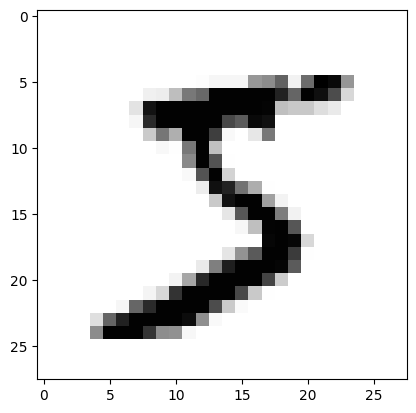

In [16]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap = 'Greys')
plt.show()

In [17]:
X_train_2 = X_train.reshape(X_train.shape[0], 784)
X_train_2.shape

(60000, 784)

In [18]:
import pandas as pd

y_cnt = pd.DataFrame(y_train).value_counts()
print(y_cnt)

0
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64


In [19]:
# 이미지 데이터의 경우 픽셀이 0~255의 값을 가지므로 각 픽셀에 255을 나누어 스케일링함.

X_train_norm = X_train.astype('float32')/255
X_test_norm = X_test.astype('float32')/255

np.set_printoptions(linewidth = 200, threshold = 1000)
print(X_train_norm[0][:10])

[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.    

In [20]:
from keras.utils import to_categorical

y_train_class = to_categorical(y_train)
y_test_class = to_categorical(y_test)

print(y_train_class[0:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [21]:
from keras.models import Sequential
from keras. layers import Flatten, Dense

model = Sequential ()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax' ) )

c:\Users\JeongJun\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

In [25]:
results = model.fit(X_train_norm, y_train_class,
                    validation_data=(X_test_norm, y_test_class),
                    epochs = 50, batch_size = 128)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9999 - loss: 0.0020 - val_accuracy: 0.9798 - val_loss: 0.0854
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9997 - loss: 0.0023 - val_accuracy: 0.9758 - val_loss: 0.1037
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9968 - loss: 0.0103 - val_accuracy: 0.9763 - val_loss: 0.0995
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9990 - loss: 0.0043 - val_accuracy: 0.9780 - val_loss: 0.0963
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9999 - loss: 0.0015 - val_accuracy: 0.9790 - val_loss: 0.0878
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 7.8028e-04 - val_accuracy: 0.9790 - val_loss: 0.0893
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 6.5278e-04 - val_accuracy: 0.9796 - val_loss: 0.0901
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 5.8560e-04 - val_

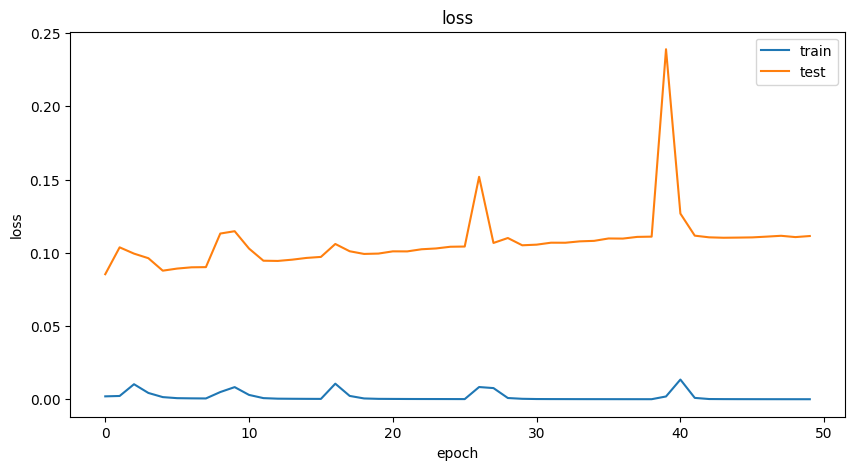

In [26]:
plt.figure(figsize = (10,5))
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('loss')
plt.xlabel ('epoch')
plt.ylabel('loss')
plt.legend( ['train','test'], loc='upper right')
plt.show()

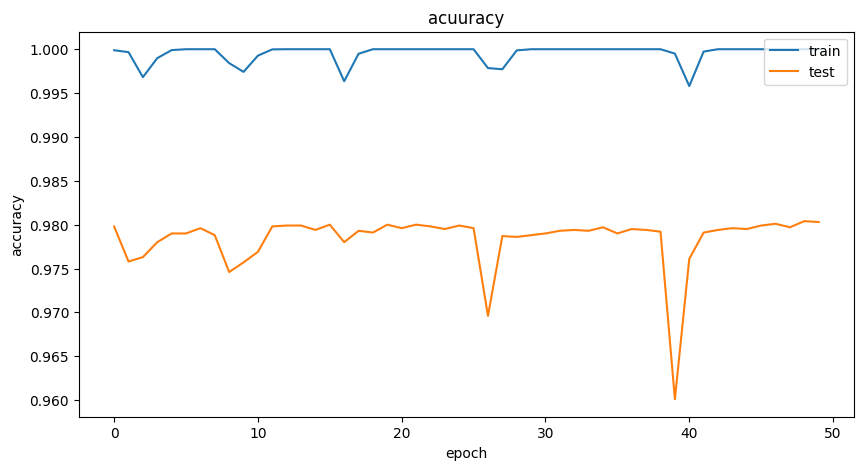

In [27]:
plt.figure(figsize = (10,5))
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('acuuracy')
plt.xlabel('epoch')
plt.ylabel ('accuracy')
plt.legend( ['train','test'], loc='upper right')
plt.show()

In [28]:
score = model.evaluate(X_train_norm, y_train_class)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 603us/step - accuracy: 1.0000 - loss: 5.1042e-05
Test loss: 5.1042065024375916e-05
Test accuracy: 1.0


In [29]:
score = model.evaluate(X_test_norm, y_test_class)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.9803 - loss: 0.1115
Test loss: 0.11146751791238785
Test accuracy: 0.9803000092506409


In [30]:
y_pred = model.predict(X_test_norm)
y_pred_class = np.argmax(y_pred, axis=1)

pd.crosstab(y_test, y_pred_class)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,968,0,1,1,1,2,2,1,4,0
1,0,1126,3,1,0,0,1,1,3,0
2,2,1,1010,4,1,0,2,3,9,0
3,0,0,6,989,0,4,0,3,2,6
4,0,0,5,0,960,0,4,2,3,8
5,2,0,0,8,3,873,3,0,2,1
6,2,3,3,1,4,5,939,0,1,0
7,1,3,7,3,1,0,0,1003,5,5
8,2,0,3,2,4,2,1,3,952,5


### **연습 문제**
- 다양한 방법을 사용하여 MNIST 손글씨 분류 모델의 정확도를 향상시키시오.

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


c:\Users\JeongJun\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9072 - loss: 0.2997 - val_accuracy: 0.9792 - val_loss: 0.0665
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9699 - loss: 0.1004 - val_accuracy: 0.9871 - val_loss: 0.0401
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9778 - loss: 0.0739 - val_accuracy: 0.9895 - val_loss: 0.0322
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9829 - loss: 0.0577 - val_accuracy: 0.9884 - val_loss: 0.0348
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9849 - loss: 0.0493 - val_accuracy: 0.9906 - val_loss: 0.0275
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9869 - loss: 0.0433 - val_accuracy: 0.9915 - val_loss: 0.0275
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9882 - loss: 0.0383 - val_accuracy: 0.9912 - val_loss: 0.0261
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9894 - loss: 0.0338 - val_accuracy: 0.

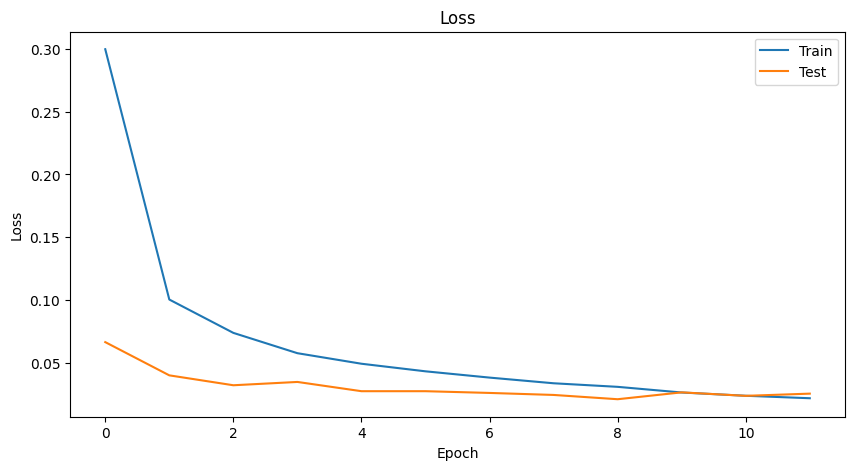

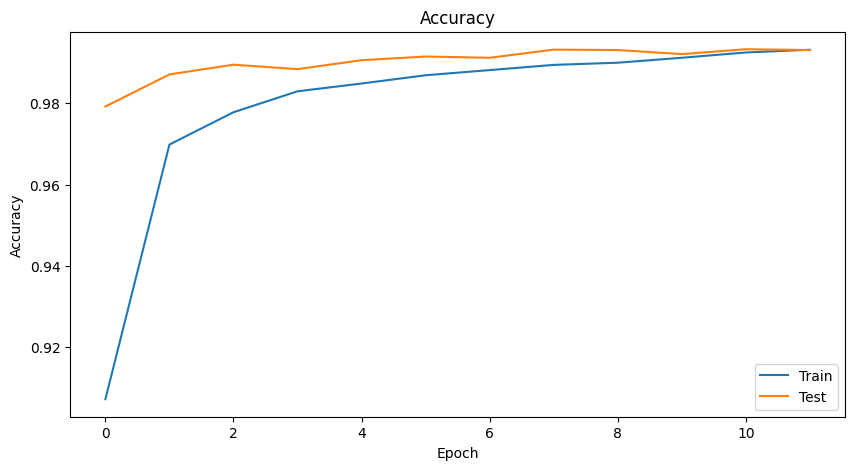

Train Loss: 0.010778690688312054
Train Accuracy: 0.9966999888420105
Test Loss: 0.021096734330058098
Test Accuracy: 0.9930999875068665
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predicted    0     1     2     3    4    5    6     7    8     9
Actual                                                          
0          976     0     2     0    0    0    0     1    1     0
1            0  1131     1     0    1    0    0     1    1     0
2            1     0  1028     0    0    0    0     3    0     0
3            0     0     3  1002    0    3    0     1    1     0
4            0     0     0     0  979    0    0     0    0     3
5            0     0     0     5    0  884    1     1    0     1
6            2     3     0     0    1    2  949     0    1     0
7            0     0     3     0    0    0    0  1021    0     4
8            1     0     3     1    0    3    1     2  959     4
9            0     0     0     0    1    2    0     4    0  1002


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

# -----------------------------
# 1. 데이터 불러오기
# -----------------------------
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# -----------------------------
# 2. 데이터 정규화 + reshape
# -----------------------------
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# CNN을 위한 차원 추가 (batch, 28, 28, 1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# -----------------------------
# 3. 원-핫 인코딩
# -----------------------------
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# -----------------------------
# 4. CNN 모델 구축
# -----------------------------
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # 과적합 방지
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# -----------------------------
# 5. 콜백 설정
# -----------------------------
callbacks = [
    EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True),
    ModelCheckpoint(filepath="best_mnist_model.keras",
                    monitor="val_loss",
                    save_best_only=True)
]

# -----------------------------
# 6. 모델 학습
# -----------------------------
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_test, y_test_cat),
    epochs=20,
    batch_size=128,
    callbacks=callbacks,
    verbose=1
)

# -----------------------------
# 7. 학습 곡선 출력
# -----------------------------
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

# -----------------------------
# 8. 모델 성능 평가
# -----------------------------
train_score = model.evaluate(X_train, y_train_cat, verbose=0)
test_score = model.evaluate(X_test, y_test_cat, verbose=0)

print("Train Loss:", train_score[0])
print("Train Accuracy:", train_score[1])
print("Test Loss:", test_score[0])
print("Test Accuracy:", test_score[1])

# -----------------------------
# 9. 예측 및 혼동 행렬
# -----------------------------
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)

print(pd.crosstab(y_test, y_pred_class, rownames=['Actual'], colnames=['Predicted']))


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


c:\Users\JeongJun\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 308,554 (1.18 MB)

 Trainable params: 308,554 (1.18 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9213 - loss: 0.2672 - val_accuracy: 0.9609 - val_loss: 0.1231
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9701 - loss: 0.0985 - val_accuracy: 0.9695 - val_loss: 0.0921
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9800 - loss: 0.0646 - val_accuracy: 0.9740 - val_loss: 0.0872
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9848 - loss: 0.0494 - val_accuracy: 0.9745 - val_loss: 0.0798
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9874 - loss: 0.0394 - val_accuracy: 0.9731 - val_loss: 0.0912
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9895 - loss: 0.0328 - val_accuracy: 0.9763 - val_loss: 0.0898
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9912 - loss: 0.0274 - val_accuracy: 0.9801 - val_loss: 0.0720
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9924 - loss: 0.0243 - val_accuracy: 0.

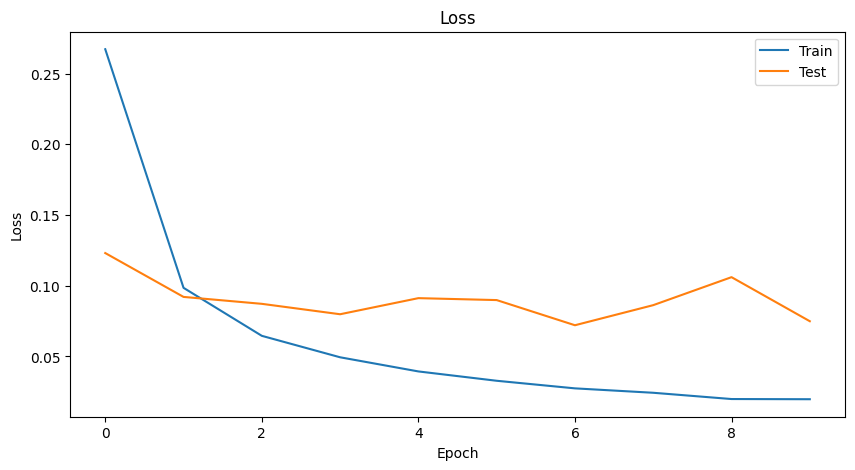

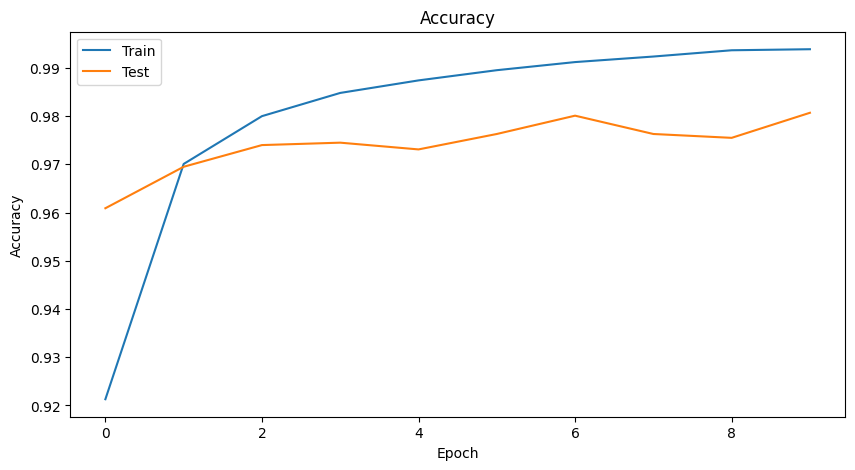

Train Loss: 0.016429785639047623
Train Accuracy: 0.9946833252906799
Test Loss: 0.07204047590494156
Test Accuracy: 0.9800999760627747
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step
Predicted    0     1     2    3    4    5    6    7    8    9
Actual                                                       
0          975     1     0    1    0    1    0    0    1    1
1            1  1128     1    0    0    1    2    1    1    0
2            3     0  1019    2    1    0    0    2    4    1
3            3     0     0  991    0    6    0    5    0    5
4            1     0     4    0  955    0    2    2    0   18
5            3     0     0    4    0  875    4    0    3    3
6            8     2     2    1    4    8  931    0    2    0
7            1     0    10    0    6    1    0  998    4    8
8            2     0     6    9    3    5    2    4  936    7
9            0     2     0    4    5    2    0    3    0  993


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint

# -----------------------------------
# 1. 데이터 로드
# -----------------------------------
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# -----------------------------------
# 2. 정규화
# -----------------------------------
X_train_norm = X_train.astype('float32') / 255
X_test_norm = X_test.astype('float32') / 255

# -----------------------------------
# 3. One-hot encoding
# -----------------------------------
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# -----------------------------------
# 4. MLP 모델 구성 (성능 향상 버전)
# -----------------------------------
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))

# 은닉층 수 증가 + 뉴런 수 증가
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

# 출력층
model.add(Dense(10, activation='softmax'))

model.summary()

# -----------------------------------
# 5. 컴파일
# -----------------------------------
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# -----------------------------------
# 6. 콜백 설정
# -----------------------------------
callbacks = [
    EarlyStopping(monitor="val_loss",
                  patience=3,
                  restore_best_weights=True),

    ModelCheckpoint(filepath="best_mlp_model.keras",
                    monitor="val_loss",
                    save_best_only=True)
]

# -----------------------------------
# 7. 모델 학습
# -----------------------------------
history = model.fit(
    X_train_norm, y_train_cat,
    validation_data=(X_test_norm, y_test_cat),
    epochs=50,
    batch_size=128,
    callbacks=callbacks,
    verbose=1
)

# -----------------------------------
# 8. 학습 곡선 시각화
# -----------------------------------
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

# -----------------------------------
# 9. 평가
# -----------------------------------
train_score = model.evaluate(X_train_norm, y_train_cat, verbose=0)
test_score = model.evaluate(X_test_norm, y_test_cat, verbose=0)

print("Train Loss:", train_score[0])
print("Train Accuracy:", train_score[1])
print("Test Loss:", test_score[0])
print("Test Accuracy:", test_score[1])

# -----------------------------------
# 10. 예측 및 혼동 행렬
# -----------------------------------
y_pred = model.predict(X_test_norm)
y_pred_class = np.argmax(y_pred, axis=1)

print(pd.crosstab(y_test, y_pred_class,
                  rownames=['Actual'],
                  colnames=['Predicted']))
